In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
import seaborn as sns
from matplotlib.patches import Polygon

In [5]:
#transfermarkt dataset from sept 2017 
df = pd.read_csv('player_data_Sept2017.csv', index_col=0)
df.head()

,Name,Date.of.birth,Place.of.birth,Age,Height,Shoe.size,Nationality,Position,Foot,Current.club,Current.market.value,Highest.market.value,City.of.birth,Country.of.birth,Birth.country.code,Continent,Continent.specific
0,Ederson,"Aug 17, 1993","Osasco (SP), Brazil",24,1.88,NaN,"Brazil, Portugal",Goalkeeper,left,Manchester City,22000000.0,22000000.0,Osasco (SP),Brazil,BR,South America,Brazil
1,Claudio Bravo,"Apr 13, 1983","Viluco, Chile",34,1.84,NaN,"Chile, Spain",Goalkeeper,right,Manchester City,8000000.0,15000000.0,Viluco,Chile,CL,South America,Andean
2,John Stones,"May 28, 1994","Barnsley, England",23,1.88,NaN,England,Defence - Centre-Back,right,Manchester City,35000000.0,35000000.0,Barnsley,United Kingdom,GB,Europe,Western Europe
3,Nicolas Otamendi,"Feb 12, 1988","Buenos Aires, Argentina",29,1.83,NaN,Argentina,Defence - Centre-Back,right,Manchester City,30000000.0,32000000.0,Buenos Aires,Argentina,AR,South America,South
4,Vincent Kompany,"Apr 10, 1986","Uccle, Belgium",31,1.93,NaN,"Belgium, Congo DR",Defence - Centre-Back,right,Manchester City,22000000.0,35000000.0,Uccle,Belgium,BE,Europe,Central Europe


In [8]:
df.rename(columns={'Current.market.value' : 'current_market_value', 'Highest.market.value' : 'highest_market_value'})

,Name,Date.of.birth,Place.of.birth,Age,Height,Shoe.size,Nationality,Position,Foot,Current.club,current_market_value,highest_market_value,City.of.birth,Country.of.birth,Birth.country.code,Continent,Continent.specific
0,Ederson,"Aug 17, 1993","Osasco (SP), Brazil",24,1.88,NaN,"Brazil, Portugal",Goalkeeper,left,Manchester City,22000000.0,22000000.0,Osasco (SP),Brazil,BR,South America,Brazil
1,Claudio Bravo,"Apr 13, 1983","Viluco, Chile",34,1.84,NaN,"Chile, Spain",Goalkeeper,right,Manchester City,8000000.0,15000000.0,Viluco,Chile,CL,South America,Andean
2,John Stones,"May 28, 1994","Barnsley, England",23,1.88,NaN,England,Defence - Centre-Back,right,Manchester City,35000000.0,35000000.0,Barnsley,United Kingdom,GB,Europe,Western Europe
3,Nicolas Otamendi,"Feb 12, 1988","Buenos Aires, Argentina",29,1.83,NaN,Argentina,Defence - Centre-Back,right,Manchester City,30000000.0,32000000.0,Buenos Aires,Argentina,AR,South America,South
4,Vincent Kompany,"Apr 10, 1986","Uccle, Belgium",31,1.93,NaN,"Belgium, Congo DR",Defence - Centre-Back,right,Manchester City,22000000.0,35000000.0,Uccle,Belgium,BE,Europe,Central Europe
5,Eliaquim Mangala,"Feb 13, 1991","Colombes, France",26,1.87,NaN,"France, Belgium",Defence - Centre-Back,left,Manchester City,15000000.0,35000000.0,Colombes,France,FR,Europe,Western Europe
6,Jason Denayer,"Jun 28, 1995","Brussel, Belgium",22,1.84,NaN,"Belgium, Congo DR",Defence - Centre-Back,right,Manchester City,4000000.0,4000000.0,Brussel,Belgium,BE,Europe,Central Europe
7,Tosin Adarabioyo,"Sep 24, 1997",Undefined,19,1.90,NaN,"England, Nigeria",Defence - Centre-Back,right,Manchester City,NaN,NaN,Undefined,NaN,NaN,NaN,NaN
8,Benjamin Mendy,"Jul 17, 1994","Longjumeau, France",23,1.85,NaN,"France, Senegal",Defence - Left-Back,left,Manchester City,30000000.0,30000000.0,Longjumeau,France,FR,Europe,Western Europe
9,Kyle Walker,"May 28, 1990","Sheffield, England",27,1.81,NaN,England,Defence - Right-Back,right,Manchester City,30000000.0,30000000.0,Sheffield,United Kingdom,GB,Europe,Western Europe


In [12]:
df_hmv = df.sort_values('highest_market_value', ascending=False)
df_hmv = df_hmv[df_hmv['highest_market_value'] >= 250000]
df_hmv.tail()

,Name,Date.of.birth,Place.of.birth,Age,Height,Shoe.size,Nationality,Position,Foot,Current.club,current_market_value,highest_market_value,City.of.birth,Country.of.birth,Birth.country.code,Continent,Continent.specific
5846,Au Chung,"Jul 11, 1989","Hongkong, Hongkong",28,1.72,NaN,Hongkong,Midfield - Attacking Midfield,Undefined,Guizhou Hengfeng Zhicheng,50000.0,250000.0,Hongkong,Hong Kong,HK,NaN,NaN
10064,Caique,"Jul 31, 1997","Salvador (BA), Brazil",20,1.98,NaN,Brazil,Goalkeeper,right,Esporte Clube Vitoria,250000.0,250000.0,Salvador (BA),Brazil,BR,South America,Brazil
19283,Christos Gromitsaris,"Feb 10, 1991","Agrinio, Greece",26,1.85,NaN,Greece,Defence - Centre-Back,right,AOK Kerkyra,200000.0,250000.0,Agrinio,Greece,GR,Europe,Southeastern Europe
12358,Erdi Sehit,"Mar 30, 1996","Sakarya, Turkey",21,NaN,NaN,Turkey,Midfield - Central Midfield,left,Genclerbirligi Ankara,100000.0,250000.0,Sakarya,Turkey,TR,Asia,Western Asia
17835,Florian Templ,"Oct 1, 1988","St. Marien, Austria",28,1.86,NaN,Austria,Striker - Centre-Forward,both,FC Blau Weiss Linz,200000.0,250000.0,St. Marien,Austria,AT,Europe,Central Europe


In [13]:
df_hmv[['Age']] = df_hmv[['Age']].astype('int')

In [14]:
print(df_hmv.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12570 entries, 1207 to 17835
Data columns (total 17 columns):
Name                    12570 non-null object
Date.of.birth           12570 non-null object
Place.of.birth          12570 non-null object
Age                     12570 non-null int64
Height                  12451 non-null float64
Shoe.size               172 non-null float64
Nationality             12570 non-null object
Position                12570 non-null object
Foot                    12570 non-null object
Current.club            12570 non-null object
current_market_value    12543 non-null float64
highest_market_value    12570 non-null float64
City.of.birth           12570 non-null object
Country.of.birth        12181 non-null object
Birth.country.code      12181 non-null object
Continent               12141 non-null object
Continent.specific      12079 non-null object
dtypes: float64(4), int64(1), object(12)
memory usage: 1.7+ MB
None


In [15]:
df_hmv.describe()

,Age,Height,Shoe.size,current_market_value,highest_market_value
count,12570.000000,12451.000000,172.000000,1.254300e+04,1.257000e+04
mean,26.744948,1.813529,9.883721,2.080681e+06,3.176914e+06
std,4.296293,0.066731,1.238218,5.392594e+06,6.614302e+06
min,16.000000,1.550000,7.500000,2.500000e+04,2.500000e+05
25%,23.000000,1.770000,9.000000,3.000000e+05,5.000000e+05
50%,27.000000,1.810000,10.000000,6.000000e+05,1.000000e+06
75%,30.000000,1.860000,10.500000,1.500000e+06,3.000000e+06
max,43.000000,2.070000,13.500000,1.200000e+08,1.200000e+08


In [48]:
df_hmv.loc[df_hmv['Position'].str.contains('Striker', case=False), 'Position'] = 'Striker'
df_hmv.loc[df_hmv['Position'].str.contains('Midfield', case=False), 'Position'] = 'Midfield'
df_hmv.loc[df_hmv['Position'].str.contains( 'Defence', case=False), 'Position'] = 'Defender'

Text(0.5,1,'Height of Most Valuable Players')

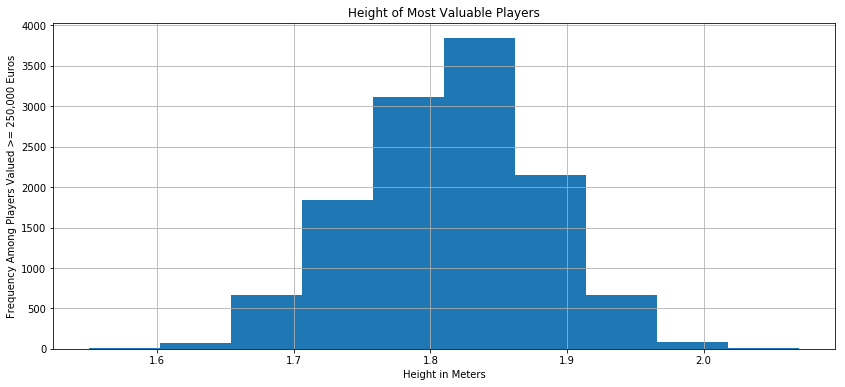

In [49]:
#global average human height of man is 173 cm
plt.figure()
df_hmv['Height'].hist(bins=10, figsize=[14,6])
plt.xlabel('Height in Meters')
plt.ylabel('Frequency Among Players Valued >= 250,000 Euros')
plt.title('Height of Most Valuable Players')

In [24]:
df_height = df_hmv['Height']
df_height = df_height.dropna()

Text(0.5,1,'Height of Most Valuable Players')

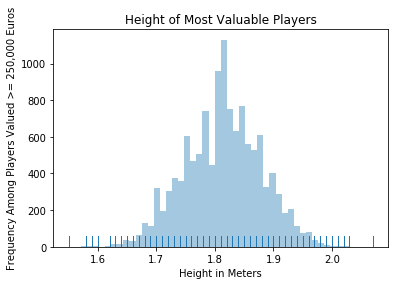

In [35]:
plt.figure()
sns.distplot(df_height, kde=False, rug=True)
plt.xlabel('Height in Meters')
plt.ylabel('Frequency Among Players Valued >= 250,000 Euros')
plt.title('Height of Most Valuable Players')


Text(0.5,1,'Height in Meters of Most Valuable Players')

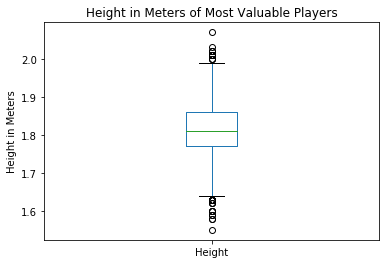

In [44]:
plt.figure()
df_height.plot.box()
plt.ylabel('Height in Meters')
plt.title('Height in Meters of Most Valuable Players')

Text(0.5,1,'Distribution of Height Among Most Valuable Players')

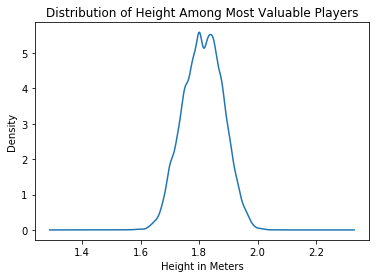

In [47]:
plt.figure()
df_height.plot.kde()
plt.xlabel('Height in Meters')
plt.title('Distribution of Height Among Most Valuable Players')

Text(0,0.5,'Current Market Value in Hundred Million Euros')

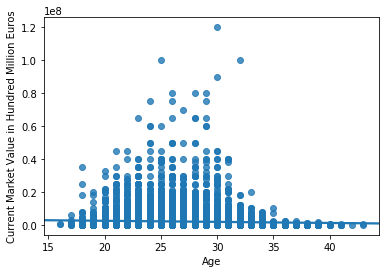

In [52]:
#two continuous variables, age and current market value
sns.regplot(x=df_hmv["Age"], y=df_hmv["current_market_value"])
plt.ylabel('Current Market Value in Hundred Million Euros')


(15, 44.728259833407883)

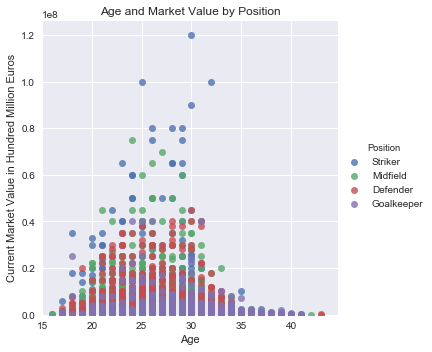

In [73]:
sns.lmplot(x='Age', y='current_market_value', data=df_hmv,
           fit_reg=False, 
           hue='Position')
plt.title('Age and Market Value by Position')
plt.ylabel('Current Market Value in Hundred Million Euros')
plt.ylim(0, None)
plt.xlim(15, None)


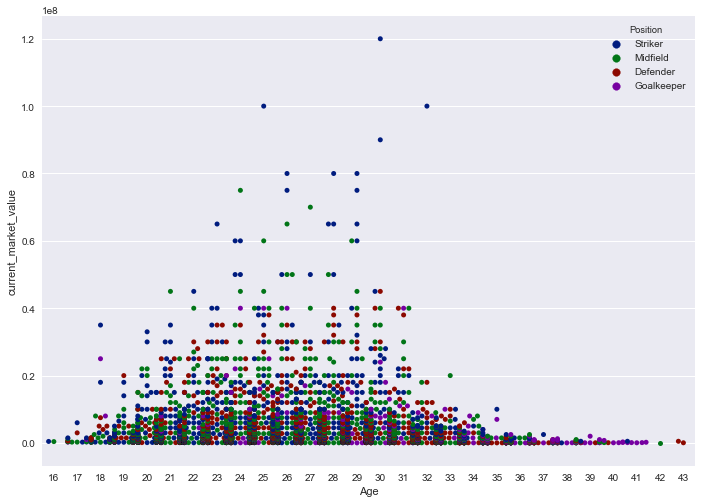

In [75]:
sns.swarmplot(x='Age', y='current_market_value', data=df_hmv, hue='Position', 
              palette='dark')

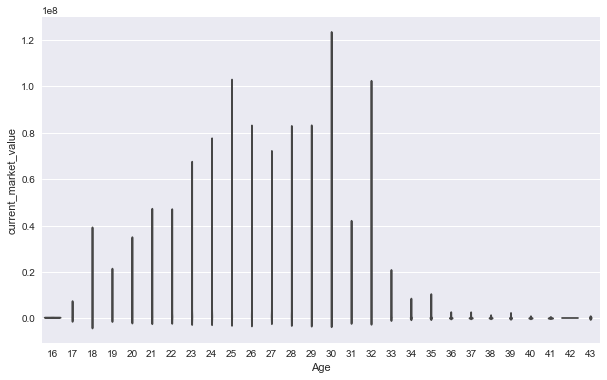

In [79]:
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Age',
               y='current_market_value', 
               data=df_hmv, 
               inner=None, # Remove the bars inside the violins
               )

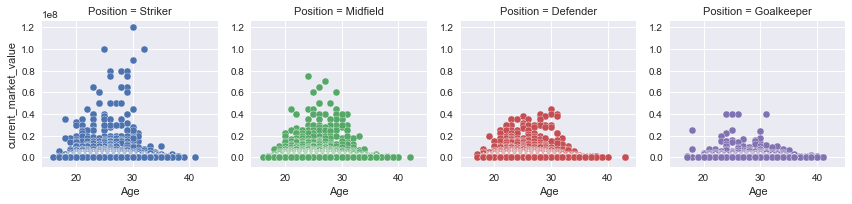

In [82]:
g = sns.FacetGrid(df_hmv, col="Position", hue="Position")
g = (g.map(plt.scatter, "Age", "current_market_value", edgecolor="w"))

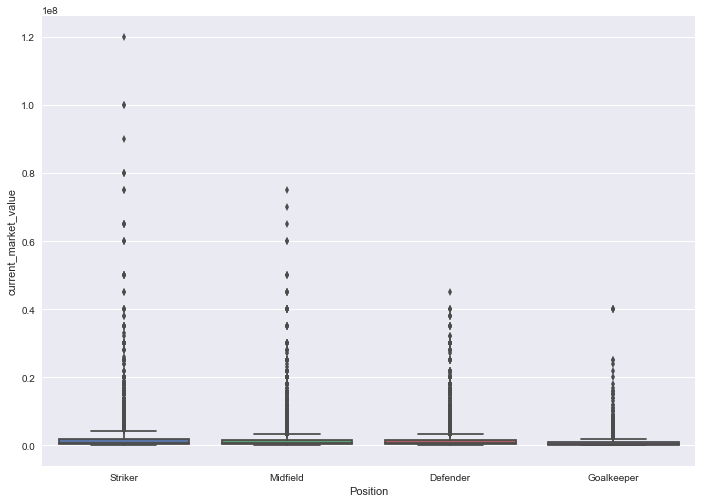

In [91]:
#can I make this horizontal to see better? maybe also with swarm overtop
ax = sns.boxplot(x="Position", y="current_market_value", data=df_hmv)